In [2]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# File Path

file_path ='covid19_tweets.csv'

# read JSON file into DataFrame
data = pd.read_csv(file_path)
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [5]:


# searching for all punctuation
data.loc[:, 'punctuation'] = data['text'].apply(lambda x: ''.join(set(re.findall(r'[^\w\s]+', str(x)))))

# replace punctuation & with and
data.loc[:, 'reviewText']= data['text'].apply( lambda x: str(x).replace('&', 'and')) 

# Preprocessed Data
Pre_data = data[['text']]

wordnet_lemmatizer = WordNetLemmatizer()  # Initialize WordNet Lemmatizer

def cleaningText(text):
    text = re.sub("[^a-zA-Z0-9]", " ", text)  # Remove Punctuation
    text = re.sub("[0-9]+", "", text)  # Remove Numbers
    text = [wordnet_lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text) if word.lower() not in stopwords.words('english')]
    return " ".join(text)

Pre_data.loc[:, 'clean_review'] = Pre_data['text'].apply(lambda x: cleaningText(str(x)))

# Tokenize clean_review column
#Pre_data.loc[:,'tokenized_review'] = Pre_data['clean_review'].apply(word_tokenize)
Pre_data

/tmp/ipykernel_23561/1342429381.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pre_data.loc[:, 'clean_review'] = Pre_data['text'].apply(lambda x: cleaningText(str(x)))


,text,clean_review
0,If I smelled the scent of hand sanitizers toda...,smelled scent hand sanitizers today someone pa...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey yankee yankeespr mlb made sense player pay...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,diane wdunlap realdonaldtrump trump never clai...
3,@brookbanktv The one gift #COVID19 has give me...,brookbanktv one gift covid give appreciation s...
4,25 July : Media Bulletin on Novel #CoronaVirus...,july medium bulletin novel coronavirusupdates ...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,thanks iamohmai nominating wearamask challenge...
179104,2020! The year of insanity! Lol! #COVID19 http...,year insanity lol covid http co ynpyzgn
179105,@CTVNews A powerful painting by Juan Lucena. I...,ctvnews powerful painting juan lucena tribute ...
179106,"More than 1,200 students test positive for #CO...",student test positive covid major university a...


# Word Cloud

In [8]:
all_text = ' '.join(Pre_data.clean_review.tolist())
all_text[:2000]

'smelled scent hand sanitizers today someone past would think intoxicated http co qzvybrogb hey yankee yankeespr mlb made sense player pay respect http co qvwzgypu diane wdunlap realdonaldtrump trump never claimed covid hoax claim effort http co jkkvhwhb brookbanktv one gift covid give appreciation simple thing always around http co zpoalfxcw july medium bulletin novel coronavirusupdates covid kansalrohit drsyedsehrish airnewsalerts ani http co mneecsjhh coronavirus covid death continue rise almost bad ever politician business want http co hxmhooxxc covid change work general recruiting specifically via proactivetalent recruiting http co bjzxzgpmbk wear face covering shopping includes visit local community pharmacy http co osuqkdd praying good health recovery chouhanshivraj covid covidpositive pope god prophet sadhu sundar selvaraj watch http co xrtykvji hurricanehanna covid http co dzcgunwl k covid case still response cbseindia hrdministry drrpnishank please cancel compartment exa http

In [9]:
from wordcloud import WordCloud, STOPWORDS

# specifying stop words
stop_words = set(STOPWORDS)

# Generating the word cloud
word_cloud = WordCloud(width=1600, height=800, stopwords=stop_words).generate(all_text)

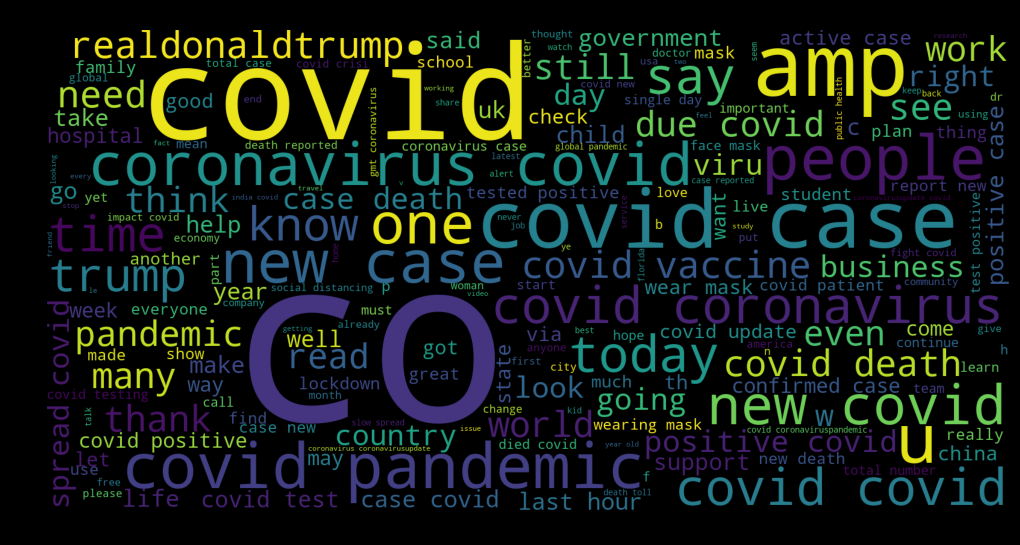

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(1, figsize=(10, 10), facecolor='k')
plt.title('Amazon Reviews of Grocery and Gourmet Foods')
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.show()

In [18]:
data_2 = pd.read_csv('finalSentimentdata2.csv')
data_2

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


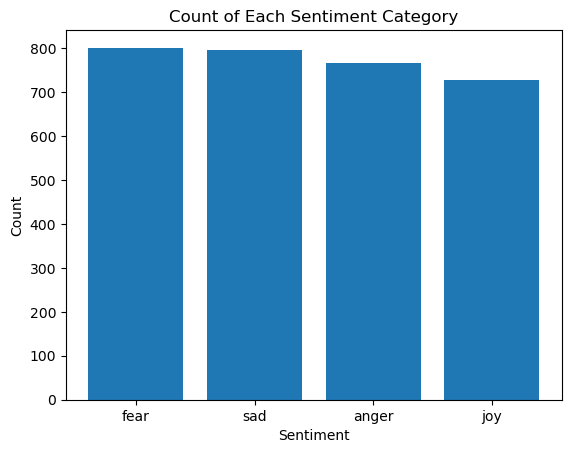

In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Count the occurrences of each sentiment category
sentiment_counts = data_2['sentiment'].value_counts()

# Plot the count of each sentiment category
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Each Sentiment Category')
plt.show()

In [12]:
# searching for all punctuation
data_2.loc[:, 'punctuation'] = data_2['text'].apply(lambda x: ''.join(set(re.findall(r'[^\w\s]+', str(x)))))

# replace punctuation & with and
data_2.loc[:, 'reviewText']= data_2['text'].apply( lambda x: str(x).replace('&', 'and')) 

# Preprocessed Data
Pre_data_2 = data_2[['text']]

wordnet_lemmatizer = WordNetLemmatizer()  # Initialize WordNet Lemmatizer

def cleaningText(text):
    text = re.sub("[^a-zA-Z0-9]", " ", text)  # Remove Punctuation
    text = re.sub("[0-9]+", "", text)  # Remove Numbers
    text = [wordnet_lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text) if word.lower() not in stopwords.words('english')]
    return " ".join(text)

Pre_data_2.loc[:, 'clean_review'] = Pre_data_2['text'].apply(lambda x: cleaningText(str(x)))

# Tokenize clean_review column
#Pre_data.loc[:,'tokenized_review'] = Pre_data['clean_review'].apply(word_tokenize)
Pre_data_2

/tmp/ipykernel_23561/1837607844.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pre_data_2.loc[:, 'clean_review'] = Pre_data_2['text'].apply(lambda x: cleaningText(str(x)))


,text,clean_review
0,agree the poor in india are treated badly thei...,agree poor india treated badly poor seek livin...
1,if only i could have spent the with this cutie...,could spent cutie vc sakshi n g h coast crossi...
2,will nature conservation remain a priority in ...,nature conservation remain priority post coron...
3,coronavirus disappearing in italy show this to...,coronavirus disappearing italy show intellectu...
4,uk records lowest daily virus death toll since...,uk record lowest daily virus death toll since ...
...,...,...
3085,today at 02 30pm a 54 year old bangladeshi mal...,today pm year old bangladeshi male admitted tr...
3086,corona virus i implore that you cease activity...,corona virus implore cease activity april st s...
3087,issa date once lockdown ends inshaallah (and c...,issa date lockdown end inshaallah corona red h...
3088,the death toll due to covid 19 rose to 31 in j...,death toll due covid rose jammu kashmir third ...


In [14]:
all_text_2 = ' '.join(Pre_data_2.clean_review.tolist())
all_text_2[:2000]

'agree poor india treated badly poor seek living singapore treated like citizen given free medical treatment given food daily sim card call home tell family fine covid case treated foc hospital could spent cutie vc sakshi n g h coast crossing republik nature conservation remain priority post corona bangladesh daily star coronavirus disappearing italy show intellectual say lockdown work uk record lowest daily virus death toll since start lockdown govt joe biden coronavirus web address land donation page campaign profiting fear demopos respected sir telangana private teacher lecturer horrible situation due covid mainly private management chaithanya nd narayana b caz told faculty like work pay pls take action nd save life also time lethal influenza think thull passing dangerous ultra hazardous situation history population thul town surrounding striked corona virus cm health sindh take notice plead govt pay attention thul retweet share thull passing dangerous ultra hazardous situation hist

In [15]:
# specifying stop words
stop_words = set(STOPWORDS)

# Generating the word cloud
word_cloud = WordCloud(width=1600, height=800, stopwords=stop_words).generate(all_text_2)

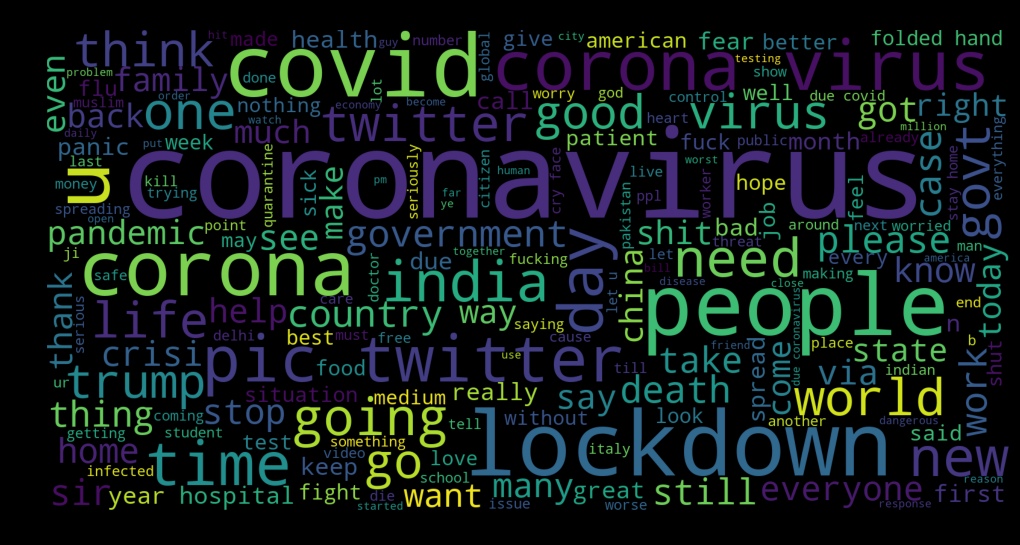

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(1, figsize=(10, 10), facecolor='k')
plt.title('Amazon Reviews of Grocery and Gourmet Foods')
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.show()